2. a

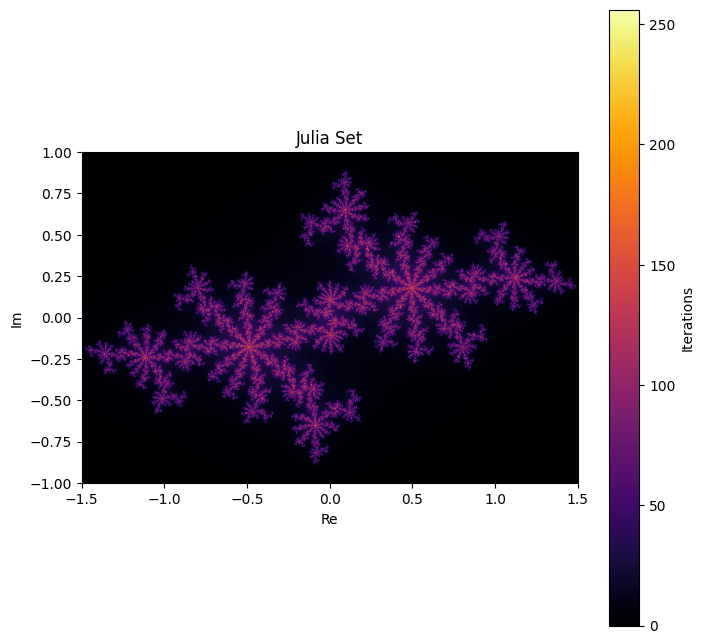

In [30]:
import numpy as np
import matplotlib.pyplot as plt

width, height = 800, 800  # Grid density
xmin, xmax = -1.5, 1.5
ymin, ymax = -1, 1
c = complex(-0.7, 0.356)  # Julia set constant
max_iter = 256  # Maximum iterations

x = np.linspace(xmin, xmax, width)
y = np.linspace(ymin, ymax, height)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y

def julia_iteration(z, c, max_iter):
    iteration_count = np.zeros(z.shape, dtype=int)
    mask = np.ones(z.shape, dtype=bool)
    
    for i in range(max_iter):
        Z[mask] = Z[mask] ** 2 + c
        mask = np.abs(Z) < 2
        iteration_count += mask
    
    return iteration_count

julia_set = julia_iteration(Z, c, max_iter)

plt.figure(figsize=(8, 8))
plt.imshow(julia_set, extent=[xmin, xmax, ymin, ymax], cmap='inferno')
plt.colorbar(label='Iterations')
plt.title('Julia Set')
plt.xlabel('Re')
plt.ylabel('Im')
plt.show()

2. b

Convex Hull Area: 2.7536517016734


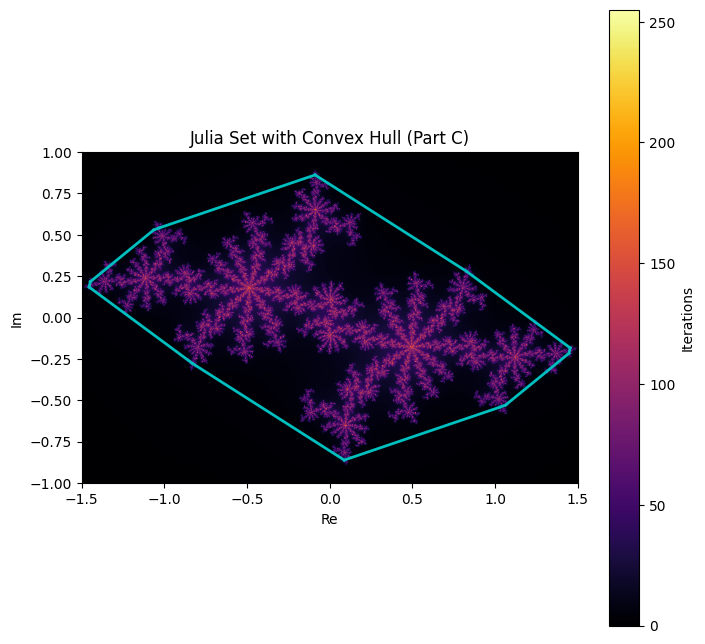

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

def julia_set_generation(c, xmin, xmax, ymin, ymax, width, height, max_iter):
   
    x = np.linspace(xmin, xmax, width)
    y = np.linspace(ymin, ymax, height)
    X, Y = np.meshgrid(x, y)
    Z = X + 1j * Y
    
    julia_array = np.zeros(Z.shape, dtype=int)
    bounded_mask = np.full(Z.shape, True, dtype=bool)
    
    for i in range(max_iter):
        Z[bounded_mask] = Z[bounded_mask]**2 + c
        escaped = np.abs(Z) > 2
        julia_array[bounded_mask & escaped] = i
        bounded_mask &= ~escaped
    
    return julia_array

def part_c_julia_convex_hull(c, xmin, xmax, ymin, ymax, width, height, max_iter, threshold_ratio=0.75):
    # Generate the Julia set iteration array
    julia_array = julia_set_generation(c, xmin, xmax, ymin, ymax, width, height, max_iter)
    
    threshold = max_iter * threshold_ratio
    
    # Extract boundary points: iteration count above threshold
    boundary_indices = np.where(julia_array > threshold)
    row_indices, col_indices = boundary_indices
    
    # Convert these pixel indices to real (x,y) coords
    boundary_x = col_indices / (width - 1) * (xmax - xmin) + xmin
    boundary_y = row_indices / (height - 1) * (ymax - ymin) + ymin
    
    # Combine into points array
    points = np.column_stack((boundary_x, boundary_y))
    
    points[:, 1] = -points[:, 1]
    
    if len(points) > 2:
        # Compute convex hull
        hull = ConvexHull(points)
        hull_area = hull.volume
        print(f"Convex Hull Area: {hull_area}")
        
        plt.figure(figsize=(8, 8))
        plt.imshow(julia_array, extent=[xmin, xmax, ymin, ymax], cmap='inferno', origin='lower')
        plt.colorbar(label='Iterations')
        plt.title('Julia Set with Convex Hull (Part C)')
        plt.xlabel('Re')
        plt.ylabel('Im')
        
        for simplex in hull.simplices:
            plt.plot(points[simplex, 0], -points[simplex, 1], 'c-', linewidth=2)
        
        plt.show()
    else:
        print("Not enough boundary points to compute the convex hull.")

if __name__ == "__main__":
    width, height = 800, 800
    xmin, xmax = -1.5, 1.5
    ymin, ymax = -1, 1
    c = complex(-0.7, 0.356)
    max_iter = 256

    part_c_julia_convex_hull(c, xmin, xmax, ymin, ymax, width, height, max_iter, threshold_ratio=0.75)


2. c

Convex Hull Area: 2.7536517016734


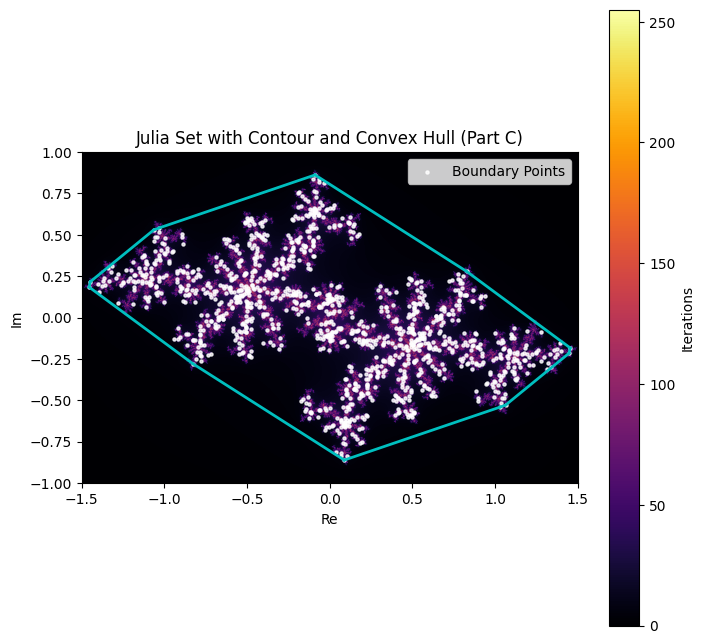

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

def julia_set_generation(c, xmin, xmax, ymin, ymax, width, height, max_iter):
  
    x_vals = np.linspace(xmin, xmax, width)
    y_vals = np.linspace(ymin, ymax, height)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = X + 1j * Y
    
    julia_array = np.zeros(Z.shape, dtype=int)
    bounded_mask = np.full(Z.shape, True, dtype=bool)
    
    for i in range(max_iter):
        # Only update points that haven't escaped yet
        Z[bounded_mask] = Z[bounded_mask]**2 + c
        escaped = np.abs(Z) > 2
        julia_array[bounded_mask & escaped] = i
        bounded_mask &= ~escaped
    
    return julia_array

def part_c_julia_convex_hull_with_points(c, xmin, xmax, ymin, ymax, width, height, max_iter, threshold_ratio=0.75):
    julia_array = julia_set_generation(c, xmin, xmax, ymin, ymax, width, height, max_iter)
    
    threshold = int(max_iter * threshold_ratio)
    row_indices, col_indices = np.where(julia_array > threshold)
    
    boundary_x = col_indices / (width - 1) * (xmax - xmin) + xmin
    boundary_y = row_indices / (height - 1) * (ymax - ymin) + ymin
    
    points = np.column_stack((boundary_x, boundary_y))
    
    # Flip Y in the array (as done in part b)
    points[:, 1] = -points[:, 1]
    
    # 3) Compute convex hull if enough points
    if len(points) > 2:
        hull = ConvexHull(points)
        hull_area = hull.volume
        print(f"Convex Hull Area: {hull_area}")
        
        # 4) Plot the Julia set using 'inferno'
        plt.figure(figsize=(8, 8))
        plt.imshow(julia_array, extent=[xmin, xmax, ymin, ymax], cmap='inferno', origin='lower')
        plt.colorbar(label='Iterations')
        plt.title('Julia Set with Contour and Convex Hull (Part C)')
        plt.xlabel('Re')
        plt.ylabel('Im')
        
        # 5) Plot boundary points as dots
        # We do a second y-flip in the plotting call to match your part b logic:
        plt.scatter(points[:, 0], -points[:, 1], s=5, color='white', alpha=0.8, label='Boundary Points')
        
        # 6) Draw the convex hull lines in cyan, also flipping y in the plot
        for simplex in hull.simplices:
            plt.plot(points[simplex, 0], -points[simplex, 1], 'c-', linewidth=2)
        
        plt.legend()
        plt.show()
    else:
        print("Not enough boundary points to compute the convex hull.")

if __name__ == "__main__":
    width, height = 800, 800
    xmin, xmax = -1.5, 1.5
    ymin, ymax = -1, 1
    c = complex(-0.7, 0.356)
    max_iter = 256
    
    part_c_julia_convex_hull_with_points(c, xmin, xmax, ymin, ymax, width, height, max_iter, threshold_ratio=0.75)


2. d

Estimated fractal dimension (box-counting): 1.424


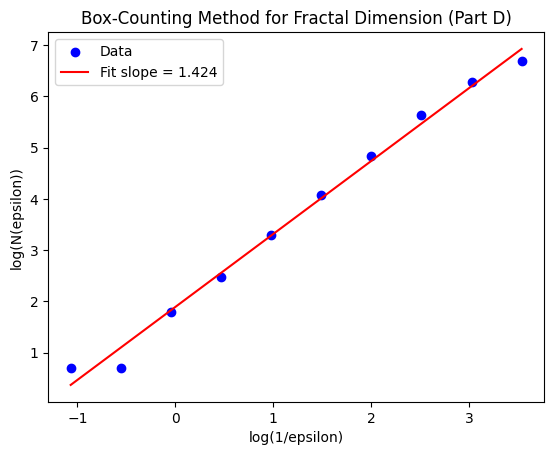

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

def julia_set_generation(c, xmin, xmax, ymin, ymax, width, height, max_iter):
    """
    Generate a 2D array (julia_array) of iteration counts for z -> z^2 + c.
    """
    x_vals = np.linspace(xmin, xmax, width)
    y_vals = np.linspace(ymin, ymax, height)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = X + 1j * Y
    
    julia_array = np.zeros(Z.shape, dtype=int)
    bounded_mask = np.full(Z.shape, True, dtype=bool)
    
    for i in range(max_iter):
        Z[bounded_mask] = Z[bounded_mask]**2 + c
        escaped = np.abs(Z) > 2
        julia_array[bounded_mask & escaped] = i
        bounded_mask &= ~escaped
    
    return julia_array

def part_c_julia_convex_hull_with_points(c, xmin, xmax, ymin, ymax, width, height, max_iter, threshold_ratio=0.75):
   
    julia_array = julia_set_generation(c, xmin, xmax, ymin, ymax, width, height, max_iter)
    
    threshold = int(max_iter * threshold_ratio)
    row_indices, col_indices = np.where(julia_array > threshold)
    
    boundary_x = col_indices / (width - 1) * (xmax - xmin) + xmin
    boundary_y = row_indices / (height - 1) * (ymax - ymin) + ymin
    
    points = np.column_stack((boundary_x, boundary_y))
    
    # Flip Y in the array
    points[:, 1] = -points[:, 1]
    
    if len(points) > 2:
        hull = ConvexHull(points)
        hull_area = hull.volume
        print(f"Convex Hull Area: {hull_area}")
        
        plt.figure(figsize=(8, 8))
        plt.imshow(julia_array, extent=[xmin, xmax, ymin, ymax], cmap='inferno', origin='lower')
        plt.colorbar(label='Iterations')
        plt.title('Julia Set with Contour and Convex Hull (Part C)')
        plt.xlabel('Re')
        plt.ylabel('Im')
        
        # Plot boundary points as dots
        plt.scatter(points[:, 0], -points[:, 1], s=5, color='white', alpha=0.8, label='Boundary Points')
        
        # Draw the convex hull lines in cyan
        for simplex in hull.simplices:
            plt.plot(points[simplex, 0], -points[simplex, 1], 'c-', linewidth=2)
        
        plt.legend()
        plt.show()
    else:
        print("Not enough boundary points to compute the convex hull.")
    
    return points  


def box_counting_dimension(points, num_scales=10):
   
    # 1. Find bounding box
    x_min, y_min = points.min(axis=0)
    x_max, y_max = points.max(axis=0)
    domain_size = max(x_max - x_min, y_max - y_min)
    
    # 2. Create a range of box sizes (eps) in geometric progression
    epsilons = np.logspace(np.log10(domain_size), np.log10(domain_size/100), num=num_scales)
    
    counts = []
    for eps in epsilons:
        idx_x = np.floor((points[:, 0] - x_min) / eps).astype(int)
        idx_y = np.floor((points[:, 1] - y_min) / eps).astype(int)
        
        unique_boxes = set(zip(idx_x, idx_y))
        counts.append(len(unique_boxes))
    
    # 3. Fit a line to log(N(eps)) vs. log(1/eps)
    log_counts = np.log(counts)
    log_inv_eps = np.log(1/epsilons)
    slope, intercept = np.polyfit(log_inv_eps, log_counts, 1)
    fractal_dimension = slope
    
    return fractal_dimension, epsilons, counts

def part_d_box_counting(points):
   
    D, epsilons, counts = box_counting_dimension(points)
    print(f"Estimated fractal dimension (box-counting): {D:.3f}")
    
    # Plot log-log data
    plt.figure()
    log_counts = np.log(counts)
    log_inv_eps = np.log(1/epsilons)
    plt.scatter(log_inv_eps, log_counts, label="Data", color='blue')
    
    # Linear fit line
    fit_line = np.polyval(np.polyfit(log_inv_eps, log_counts, 1), log_inv_eps)
    plt.plot(log_inv_eps, fit_line, 'r-', label=f"Fit slope = {D:.3f}")
    
    plt.xlabel("log(1/epsilon)")
    plt.ylabel("log(N(epsilon))")
    plt.title("Box-Counting Method for Fractal Dimension (Part D)")
    plt.legend()
    plt.show()


if __name__ == "__main__":
    width, height = 800, 800
    xmin, xmax = -1.5, 1.5
    ymin, ymax = -1, 1
    c = complex(-0.7, 0.356)
    max_iter = 256
    
    # Part (d): box counting on those boundary points
    part_d_box_counting(boundary_points)
